In [9]:
import sqlite3
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

1. to highlight 10 wines to increase sales. 



In [20]:
import sqlite3

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query
query = """
SELECT wines.name, wines.ratings_average, wines.ratings_count, vintages.year, vintages.price_euros
FROM wines
JOIN vintages ON wines.id = vintages.wine_id
ORDER BY wines.ratings_average DESC, wines.ratings_count DESC
LIMIT 10;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    wine_name, rating_avarage, rating_count, year, price_euros=row

    print(f'Wine Name: {wine_name}, Average Rating: {rating_avarage}, Count Rating:{rating_count}, Year: {year}, Price: {price_euros}')

# Close the cursor and connection
cursor.close()
db_connection.close()


Wine Name: Cabernet Sauvignon, Average Rating: 4.8, Count Rating:2941, Year: 2015, Price: 1558.75
Wine Name: Amarone della Valpolicella Classico Riserva, Average Rating: 4.8, Count Rating:587, Year: 2011, Price: 1046.25
Wine Name: Fratini Bolgheri Superiore, Average Rating: 4.8, Count Rating:153, Year: 2018, Price: 262.6
Wine Name: Mágico, Average Rating: 4.8, Count Rating:146, Year: 2019, Price: 480.0
Wine Name: Cristal Rosé Vinothèque, Average Rating: 4.8, Count Rating:88, Year: 2000, Price: 1600.0
Wine Name: Batard-Montrachet Grand Cru, Average Rating: 4.8, Count Rating:34, Year: 2020, Price: 1149.5
Wine Name: Unico, Average Rating: 4.7, Count Rating:45140, Year: 2012, Price: 410.0
Wine Name: Unico, Average Rating: 4.7, Count Rating:45140, Year: 2013, Price: 445.0
Wine Name: Unico, Average Rating: 4.7, Count Rating:45140, Year: 1965, Price: 1040.6
Wine Name: Sauternes, Average Rating: 4.7, Count Rating:44126, Year: 2005, Price: 928.3


try to find cheapest wine with the highest rating

In [21]:
import sqlite3

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query
query = """
SELECT wines.name, wines.ratings_average, wines.ratings_count, vintages.year, vintages.price_euros
FROM wines
JOIN vintages ON wines.id = vintages.wine_id
ORDER BY wines.ratings_average DESC, vintages.price_euros ASC
LIMIT 10;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    wine_name, rating_avarage, rating_count, year, price_euros=row

    print(f'Wine Name: {wine_name}, Average Rating: {rating_avarage}, Count Rating:{rating_count}, Year: {year}, Price: {price_euros}')

# Close the cursor and connection
cursor.close()
db_connection.close()


Wine Name: Fratini Bolgheri Superiore, Average Rating: 4.8, Count Rating:153, Year: 2018, Price: 262.6
Wine Name: Mágico, Average Rating: 4.8, Count Rating:146, Year: 2019, Price: 480.0
Wine Name: Amarone della Valpolicella Classico Riserva, Average Rating: 4.8, Count Rating:587, Year: 2011, Price: 1046.25
Wine Name: Batard-Montrachet Grand Cru, Average Rating: 4.8, Count Rating:34, Year: 2020, Price: 1149.5
Wine Name: Cabernet Sauvignon, Average Rating: 4.8, Count Rating:2941, Year: 2015, Price: 1558.75
Wine Name: Cristal Rosé Vinothèque, Average Rating: 4.8, Count Rating:88, Year: 2000, Price: 1600.0
Wine Name: La Vina de Corteo, Average Rating: 4.7, Count Rating:374, Year: 2019, Price: 99.95
Wine Name: Permassimo, Average Rating: 4.7, Count Rating:186, Year: 2016, Price: 166.15
Wine Name: Don PX Convento Selección, Average Rating: 4.7, Count Rating:1224, Year: 1955, Price: 198.4
Wine Name: Ligne de Crete Les Grandes Vignes Hermitage, Average Rating: 4.7, Count Rating:76, Year: 2019,

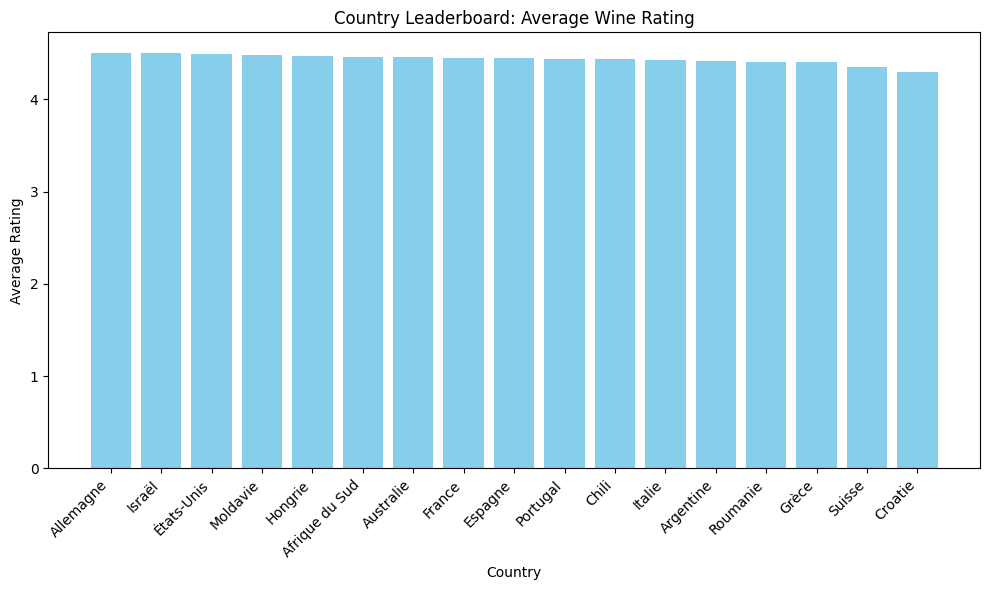

('Allemagne', 4.500000000000001)
('Israël', 4.5)
('États-Unis', 4.4905405405405405)
('Moldavie', 4.4799999999999995)
('Hongrie', 4.472727272727273)
('Afrique du Sud', 4.459090909090909)
('Australie', 4.458333333333333)
('France', 4.447129909365562)
('Espagne', 4.4436170212765935)
('Portugal', 4.435714285714287)
('Chili', 4.43125)
('Italie', 4.430026109660581)
('Argentine', 4.417391304347826)
('Roumanie', 4.4)
('Grèce', 4.4)
('Suisse', 4.35)
('Croatie', 4.3)


In [14]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query
query= '''
    SELECT countries.name AS country_name, AVG(wines.ratings_average) AS avg_rating
    FROM countries 
    JOIN regions ON countries.code = regions.country_code
    JOIN wines ON regions.id = wines.region_id
    GROUP BY countries.name
    ORDER BY avg_rating DESC;   
'''
cursor.execute(query)
result = cursor.fetchall()

# Separate data for plotting
country_names = [row[0] for row in result]
avg_ratings = [row[1] for row in result]

# Close the cursor and connection
cursor.close()
db_connection.close()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_names, avg_ratings, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Country Leaderboard: Average Wine Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
for row in result:
    print(row)

question 2:

Calculate the Average Rating and Wine Count per Country

In [15]:
#order by rating average
import sqlite3

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query to calculate average rating and wine count per country and order by average rating
query = """
SELECT countries.name, 
       AVG(wines.ratings_average), 
       COUNT(wines.id)
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY AVG(wines.ratings_average) DESC;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    country_name, avg_rating, wine_count = row
    print(f"Country: {country_name}, Average Rating: {avg_rating:.2f}, Wine Count: {wine_count}")

# Close the cursor and connection
cursor.close()
db_connection.close()


Country: Allemagne, Average Rating: 4.50, Wine Count: 14
Country: Israël, Average Rating: 4.50, Wine Count: 1
Country: États-Unis, Average Rating: 4.49, Wine Count: 74
Country: Moldavie, Average Rating: 4.48, Wine Count: 5
Country: Hongrie, Average Rating: 4.47, Wine Count: 11
Country: Afrique du Sud, Average Rating: 4.46, Wine Count: 22
Country: Australie, Average Rating: 4.46, Wine Count: 12
Country: France, Average Rating: 4.45, Wine Count: 331
Country: Espagne, Average Rating: 4.44, Wine Count: 94
Country: Portugal, Average Rating: 4.44, Wine Count: 28
Country: Chili, Average Rating: 4.43, Wine Count: 16
Country: Italie, Average Rating: 4.43, Wine Count: 383
Country: Argentine, Average Rating: 4.42, Wine Count: 23
Country: Roumanie, Average Rating: 4.40, Wine Count: 1
Country: Grèce, Average Rating: 4.40, Wine Count: 2
Country: Suisse, Average Rating: 4.35, Wine Count: 2
Country: Croatie, Average Rating: 4.30, Wine Count: 1


In [16]:
#order by wine count
import sqlite3

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query to calculate average rating and wine count per country and order by average rating
query = """
SELECT countries.name, 
       AVG(wines.ratings_average), 
       COUNT(wines.id)
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY COUNT(wines.id) DESC;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    country_name, avg_rating, wine_count = row
    print(f"Country: {country_name}, Average Rating: {avg_rating:.2f}, Wine Count: {wine_count}")

# Close the cursor and connection
cursor.close()
db_connection.close()

Country: Italie, Average Rating: 4.43, Wine Count: 383
Country: France, Average Rating: 4.45, Wine Count: 331
Country: Espagne, Average Rating: 4.44, Wine Count: 94
Country: États-Unis, Average Rating: 4.49, Wine Count: 74
Country: Portugal, Average Rating: 4.44, Wine Count: 28
Country: Argentine, Average Rating: 4.42, Wine Count: 23
Country: Afrique du Sud, Average Rating: 4.46, Wine Count: 22
Country: Chili, Average Rating: 4.43, Wine Count: 16
Country: Allemagne, Average Rating: 4.50, Wine Count: 14
Country: Australie, Average Rating: 4.46, Wine Count: 12
Country: Hongrie, Average Rating: 4.47, Wine Count: 11
Country: Moldavie, Average Rating: 4.48, Wine Count: 5
Country: Suisse, Average Rating: 4.35, Wine Count: 2
Country: Grèce, Average Rating: 4.40, Wine Count: 2
Country: Roumanie, Average Rating: 4.40, Wine Count: 1
Country: Israël, Average Rating: 4.50, Wine Count: 1
Country: Croatie, Average Rating: 4.30, Wine Count: 1


Calculate the Impact Score:

Define an "Impact Score" for each country, which is a combination of the average rating and the number of wines.

In [17]:
import sqlite3

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query
query = """
SELECT countries.name AS country_name, 
       AVG(wines.ratings_average) AS avg_rating, 
       COUNT(wines.id) AS wine_count,
       (AVG(wines.ratings_average) * COUNT(wines.id)) AS impact_score
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY impact_score DESC;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for rank, row in enumerate(result, start=1):
    country_name, avg_rating, wine_count, impact_score = row
    print(f"Rank: {rank}, Country: {country_name}, Average Rating: {avg_rating:.2f}, Wine Count: {wine_count}, Impact Score: {impact_score:.2f}")

# Close the cursor and connection
cursor.close()
db_connection.close()


Rank: 1, Country: Italie, Average Rating: 4.43, Wine Count: 383, Impact Score: 1696.70
Rank: 2, Country: France, Average Rating: 4.45, Wine Count: 331, Impact Score: 1472.00
Rank: 3, Country: Espagne, Average Rating: 4.44, Wine Count: 94, Impact Score: 417.70
Rank: 4, Country: États-Unis, Average Rating: 4.49, Wine Count: 74, Impact Score: 332.30
Rank: 5, Country: Portugal, Average Rating: 4.44, Wine Count: 28, Impact Score: 124.20
Rank: 6, Country: Argentine, Average Rating: 4.42, Wine Count: 23, Impact Score: 101.60
Rank: 7, Country: Afrique du Sud, Average Rating: 4.46, Wine Count: 22, Impact Score: 98.10
Rank: 8, Country: Chili, Average Rating: 4.43, Wine Count: 16, Impact Score: 70.90
Rank: 9, Country: Allemagne, Average Rating: 4.50, Wine Count: 14, Impact Score: 63.00
Rank: 10, Country: Australie, Average Rating: 4.46, Wine Count: 12, Impact Score: 53.50
Rank: 11, Country: Hongrie, Average Rating: 4.47, Wine Count: 11, Impact Score: 49.20
Rank: 12, Country: Moldavie, Average Rat